Bayesian Analysis with Python - Second Edition - Osvaldo Martin

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import arviz as az

95% of the samples will have values within the [-1.96, +1.96] range
we are going to parameterize the Normal distribution using the standard deviation

In [6]:
μ = 0.
σ = 1.
X = stats.norm(μ, σ)
X.rvs(3)

array([ 0.48290559,  0.80268821, -0.21349959])

[]

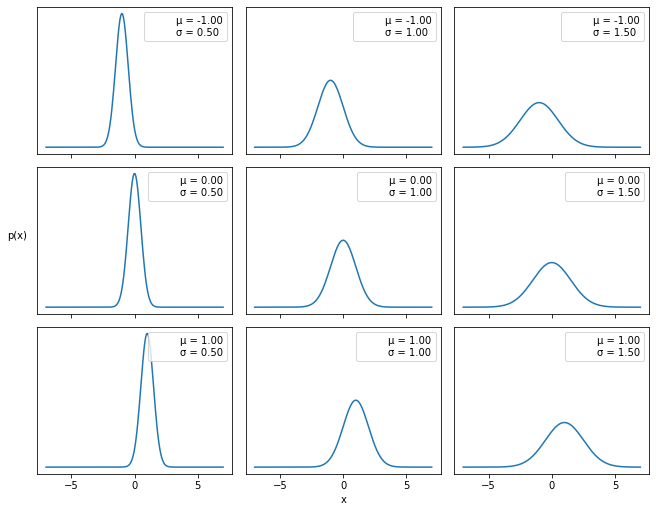

In [7]:
mu_params = [-1, 0, 1]
sd_params = [0.5, 1, 1.5]
x = np.linspace(-7, 7, 200)
_, ax = plt.subplots(len(mu_params), len(sd_params), sharex=True, 
                     sharey=True,
                     figsize=(9, 7), constrained_layout=True)
for i in range(3):
    for j in range(3):
        mu = mu_params[i]
        sd = sd_params[j]
        y = stats.norm(mu, sd).pdf(x)
        ax[i,j].plot(x, y)
        ax[i,j].plot([], label="μ = {:3.2f}\nσ = {:3.2f}".format(mu, 
                     sd), alpha=0)
        ax[i,j].legend(loc=1)
ax[2,1].set_xlabel('x')
ax[1,0].set_ylabel('p(x)', rotation=0, labelpad=20)
ax[1,0].set_yticks([])

probability of getting  heads (or in general, successes) out of  coin tosses (or in general, trials or experiments) given a fixed value of :

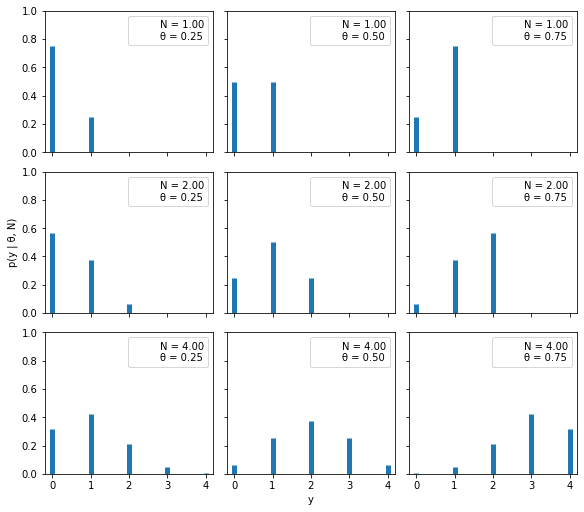

In [9]:
n_params = [1, 2, 4]  # Number of trials
p_params = [0.25, 0.5, 0.75]  # Probability of success

x = np.arange(0, max(n_params)+1)
f,ax = plt.subplots(len(n_params), len(p_params), sharex=True, 
                    sharey=True,
                    figsize=(8, 7), constrained_layout=True)

for i in range(len(n_params)):
    for j in range(len(p_params)):
        n = n_params[i]
        p = p_params[j]

        y = stats.binom(n=n, p=p).pmf(x)

        ax[i,j].vlines(x, 0, y, colors='C0', lw=5)
        ax[i,j].set_ylim(0, 1)
        ax[i,j].plot(0, 0, label="N = {:3.2f}\nθ = {:3.2f}".format(n,p), alpha=0)
        ax[i,j].legend()

        ax[2,1].set_xlabel('y')
        ax[1,0].set_ylabel('p(y | θ, N)')
        ax[0,0].set_xticks(x)

beta(a,b) distributions

Text(0.07, 0.5, 'p(θ)')

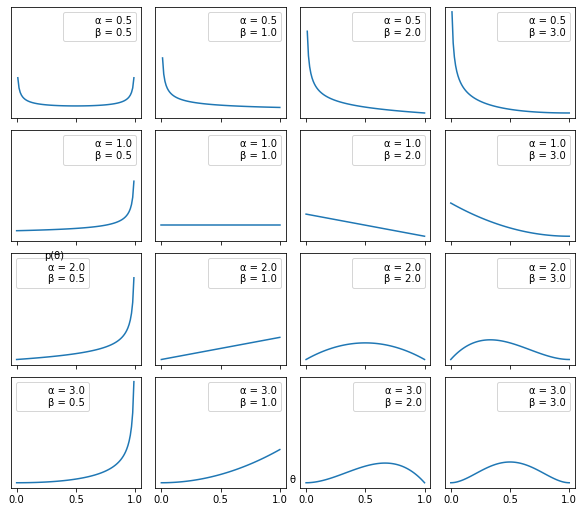

In [10]:
params = [0.5, 1, 2, 3]
x = np.linspace(0, 1, 100)
f, ax = plt.subplots(len(params), len(params), sharex=True, 
                     sharey=True,
                     figsize=(8, 7), constrained_layout=True)
for i in range(4):
    for j in range(4):
        a = params[i]
        b = params[j]
        y = stats.beta(a, b).pdf(x)
        ax[i,j].plot(x, y)
        ax[i,j].plot(0, 0, label="α = {:2.1f}\nβ = {:2.1f}".format(a,b), alpha=0)
        ax[i,j].legend()
ax[1,0].set_yticks([])
ax[1,0].set_xticks([0, 0.5, 1])
f.text(0.5, 0.05, 'θ', ha='center')
f.text(0.07, 0.5, 'p(θ)', va='center', rotation=0)

In the following code, you will see there is actually one line that computes the results while the others are there just to get a nice plot:

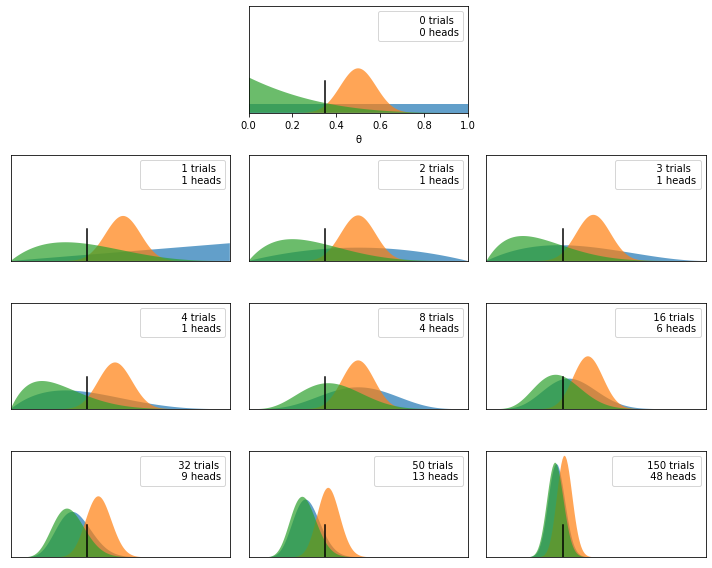

In [11]:
plt.figure(figsize=(10, 8))

n_trials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150]
data = [0, 1, 1, 1, 1, 4, 6, 9, 13, 48]
theta_real = 0.35

beta_params = [(1, 1), (20, 20), (1, 4)]
dist = stats.beta
x = np.linspace(0, 1, 200)

for idx, N in enumerate(n_trials):
    if idx == 0:
        plt.subplot(4, 3, 2)
        plt.xlabel('θ')
    else:
        plt.subplot(4, 3, idx+3)
        plt.xticks([])
    y = data[idx]
    for (a_prior, b_prior) in beta_params:
        p_theta_given_y = dist.pdf(x, a_prior + y, b_prior + N - y)
        plt.fill_between(x, 0, p_theta_given_y, alpha=0.7)

    plt.axvline(theta_real, ymax=0.3, color='k')
    plt.plot(0, 0, label=f'{N:4d} trials\n{y:4d} heads', alpha=0)
    plt.xlim(0, 1)
    plt.ylim(0, 12)
    plt.legend()
    plt.yticks([])
plt.tight_layout()

The number of trials (or coin tosses) and the number of heads are indicated in each subplot's legend. There is also a black vertical line at 0.35 representing the true value for . Of course, in real problems, we do not know this value, and it is here just for pedagogical reasons. This figure can teach us a lot about Bayesian analysis, so grab your coffee, tea, or favorite drink and let's take a moment to understand it:

* The result of a Bayesian analysis is a posterior distribution, not a single value but a distribution of plausible values given the data and our model.

* The most probable value is given by the mode of the posterior (the peak of the distribution).

* The spread of the posterior is proportional to the uncertainty about the value of a parameter; the more spread out the distribution, the less certain we are.

* Intuitively, we are more confident in a result when we have observed more data supporting that result. Thus, even when numerically , seeing four heads out of eight trials gives us more confidence that the bias is 0.5 than observing one head out of two trials. This intuition is reflected in the posterior, as you can check for yourself if you pay attention to the (blue) posterior in the third and sixth subplots; while the mode is the same, the spread (uncertainty) is larger in the third subplot than in the sixth subplot.

 * Given a sufficiently large amount of data, two or more Bayesian models with different priors will tend to converge to the same result. In the limit of infinite data, no matter which prior we use, all of them will provide the same posterior. Remember that infinite is a limit and not a number, so from a practical point of view, we could get practically indistinguishably posteriors for a finite and rather small number of data points.

* How fast posteriors converge to the same distribution depends on the data and the model. In the preceding figure, we can see that the posteriors coming from the blue prior (uniform) and green prior (biased towards tails) converge faster to almost the same distribution, while it takes longer for the orange posterior (the one coming from the concentrated prior). In fact, even after 150 trials, it is somehow easy to recognize the orange posterior as a different distribution from the two others.

* Something not obvious from the figure is that we will get the same result if we update the posterior sequentially than if we do it all at once. We can compute the posterior 150 times, each time adding one more observation and using the obtained posterior as the new prior, or we can just compute one posterior for the 150 tosses at once. The result will be exactly the same. This feature not only makes perfect sense, it also leads to a natural way of updating our estimations when we get new data, a situation common in many data-analysis problems.

A commonly-used device to summarize the spread of a posterior distribution is to use a Highest-Posterior Density (HPD) interval. An HPD is the shortest interval containing a given portion of the probability density. One of the most commonly-used is the 95% HPD, often accompanied by the 50% HPD. If we say that the 95% HPD for some analysis is [2-5], we mean that according to our data and model, we think the parameter in question is between 2 and 5 with a probability of 0.95.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000284CC684388>],
      dtype=object)

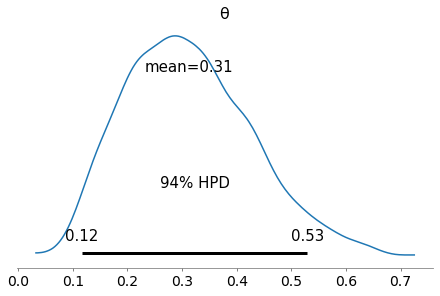

In [12]:
np.random.seed(1)
az.plot_posterior({'θ':stats.beta.rvs(5, 11, size=1000)})

You can change this by passing a different value to the credible_interval argument.

If you are familiar with the frequentist paradigm, please note that HPD intervals are not the same as confidence intervals. The HPD has a very intuitive interpretation, to the point that people often misinterpret frequentist confidence intervals as if they were Bayesian credible intervals. Performing a fully-Bayesian analysis enables us to talk about the probability of a parameter having some value. This is not possible in the frequentist framework since parameters are fixed by design; a frequentist confidence interval contains or does not contain the true value of a parameter.